<a href="https://colab.research.google.com/github/Ishita95-harvad/Kaggle-s-Most-Upvoted-Datasets-Overview/blob/main/Kaggle%E2%80%99s_Most_Upvoted_Datasets_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kaggle’s Most Upvoted Datasets Overview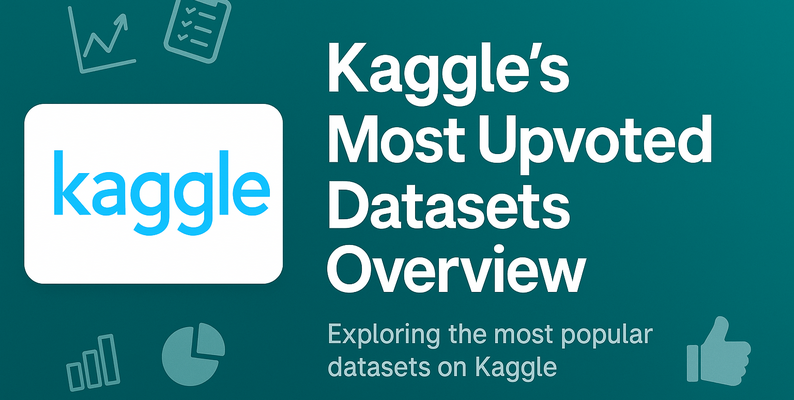**
Exploring the most popular datasets on Kaggle

## Data loading

### Subtask:
Load the "kaggle_top_100_dataset.csv" file into a Pandas DataFrame.


**Reasoning**:
Load the provided CSV file into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('kaggle_top_100_dataset.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'kaggle_top_100_dataset.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: 'utf-8' codec can't decode byte 0xfc in position 199: invalid start byte


**Reasoning**:
The previous attempt failed due to a decoding error.  I'll try again with a different encoding.  I will try 'latin-1' encoding.



In [2]:
import pandas as pd

try:
    df = pd.read_csv('kaggle_top_100_dataset.csv', encoding='latin-1')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'kaggle_top_100_dataset.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: Error tokenizing data. C error: Expected 1 fields in line 52, saw 2



**Reasoning**:
The error message indicates a problem with the number of fields in a specific line of the CSV file. I will try to load the file using the `sep` parameter to specify the delimiter.  Since the error is in line 52, I will try to specify the delimiter to be a comma.



In [3]:
import pandas as pd

try:
    df = pd.read_csv('kaggle_top_100_dataset.csv', encoding='latin-1', sep=',')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'kaggle_top_100_dataset.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: Error tokenizing data. C error: Expected 1 fields in line 52, saw 2



**Reasoning**:
The error persists despite specifying the separator.  The error message "Expected 1 fields in line 52, saw 2" suggests that a line in the file might have an extra comma or a different delimiter.  I will try to use the `on_bad_lines` parameter to skip bad lines.  This will allow the loading process to continue even when encountering problematic lines, but this may affect the data if the bad lines hold important information.



In [4]:
import pandas as pd

try:
    df = pd.read_csv('kaggle_top_100_dataset.csv', encoding='latin-1', on_bad_lines='skip')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'kaggle_top_100_dataset.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,Dataset_Name;Author;Last_Update;Usability;File_Count;Data_Type;Size;Upvote;Rank
0,Bitcoin Historical Data;Zielak;2025;100;1;CSV;...
1,International football results from 1872 to 20...
2,Fruits-360 dataset;Mihai Oltean;2025;88;240356...
3,Formula 1 World Championship (1950 - 2024);Vop...
4,arXiv Dataset;Cornell University;2025;88;1;JSO...


(84, 1)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure, identify data types, check for missing values, and examine the distribution of key variables. Also determine the shape of the data, and handle the single column issue from the previous step.


**Reasoning**:
The dataframe currently has only one column with semicolon-separated values.  Split this column into multiple columns based on the semicolon delimiter.  Then, determine the shape of the resulting DataFrame and display it.  Check data types of each column, identify missing values, and calculate the total number of missing values per column.  Analyze numerical and categorical columns' distributions.



In [5]:
# Split the single column into multiple columns based on the semicolon delimiter
df = df['Dataset_Name;Author;Last_Update;Usability;File_Count;Data_Type;Size;Upvote;Rank'].str.split(';', expand=True)

#Rename the columns
df.columns = ['Dataset_Name', 'Author', 'Last_Update', 'Usability', 'File_Count', 'Data_Type', 'Size', 'Upvote', 'Rank']

# Determine the shape of the resulting DataFrame and display it
print("Shape of the DataFrame:", df.shape)
display(df.head())

# Identify the data type of each column
print("\nData Types of each column:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values per column:")
print(df.isnull().sum())

# Analyze numerical columns' distributions
numerical_cols = ['Views', 'Downloads', 'Kernels', 'Upvote', 'Rank', 'Size', 'File_Count']
print("\nDescriptive statistics for numerical columns:")
for col in numerical_cols:
    if col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"\nStatistics for {col}:")
            print(df[col].describe())
        except Exception as e:
            print(f"Error converting {col} to numeric: {e}")
    else:
        print(f"Column '{col}' not found in the DataFrame.")

# Analyze categorical columns' unique values and their frequencies
categorical_cols = ['Title', 'Tags', 'Data_Type', 'Usability']
print("\nUnique values and frequencies for categorical columns:")
for col in categorical_cols:
    if col in df.columns:
        print(f"\nColumn: {col}")
        print(df[col].value_counts())
    else:
      print(f"Column '{col}' not found in the DataFrame.")

Shape of the DataFrame: (84, 9)


,Dataset_Name,Author,Last_Update,Usability,File_Count,Data_Type,Size,Upvote,Rank
0,Bitcoin Historical Data,Zielak,2025,100,1,CSV,98 MB,3693,Gold
1,International football results from 1872 to 2025,Mart Jürisoo,2025,100,4,CSV,1 MB,2315,Gold
2,Fruits-360 dataset,Mihai Oltean,2025,88,240356,other,4 GB,3133,Gold
3,Formula 1 World Championship (1950 - 2024),Vopani,2025,100,14,CSV,7 MB,1937,Gold
4,arXiv Dataset,Cornell University,2025,88,1,JSON,2 GB,1480,Bronze



Data Types of each column:
Dataset_Name    object
Author          object
Last_Update     object
Usability       object
File_Count      object
Data_Type       object
Size            object
Upvote          object
Rank            object
dtype: object

Missing Values per column:
Dataset_Name    0
Author          0
Last_Update     0
Usability       0
File_Count      0
Data_Type       0
Size            0
Upvote          0
Rank            0
dtype: int64

Descriptive statistics for numerical columns:
Column 'Views' not found in the DataFrame.
Column 'Downloads' not found in the DataFrame.
Column 'Kernels' not found in the DataFrame.

Statistics for Upvote:
count       84.000000
mean      3416.214286
std       5723.473705
min       1407.000000
25%       1609.250000
50%       2247.000000
75%       3168.750000
max      52058.000000
Name: Upvote, dtype: float64

Statistics for Rank:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Rank,

**Reasoning**:
The previous code block successfully split the single column, but some numerical columns ('Size', 'Rank') could not be converted to numeric.  The 'File_Count' column was converted successfully.  Additionally, the code didn't handle the 'Last_Update' column which appears to contain a year, and needs to be handled appropriately.  Also, the 'Upvote' column needs cleaning as well.  The goal is to explore and analyze the data, and these columns need further processing to understand their distribution.  Let's handle these issues in the next step.



In [6]:
#Further processing for 'Size' column
df['Size'] = df['Size'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

#Further processing for 'Last_Update' column
df['Last_Update'] = pd.to_numeric(df['Last_Update'], errors='coerce')

#Further processing for 'Upvote' column
df['Upvote'] = pd.to_numeric(df['Upvote'], errors='coerce')

#Further processing for 'Rank' column
df['Rank'] = df['Rank'].astype(str).str.strip()
#Further processing for 'Rank' column
rank_mapping = {'Gold': 1, 'Silver': 2, 'Bronze': 3}
df['Rank'] = df['Rank'].map(rank_mapping).fillna(0).astype(int)


#Re-analyze numerical columns' distributions
numerical_cols = ['Size', 'Upvote', 'Rank', 'File_Count', 'Last_Update']
print("\nDescriptive statistics for numerical columns:")
for col in numerical_cols:
    if col in df.columns:
        try:
            print(f"\nStatistics for {col}:")
            print(df[col].describe())
        except Exception as e:
            print(f"Error converting {col} to numeric: {e}")
    else:
        print(f"Column '{col}' not found in the DataFrame.")




Descriptive statistics for numerical columns:

Statistics for Size:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Size, dtype: float64

Statistics for Upvote:
count       84.000000
mean      3416.214286
std       5723.473705
min       1407.000000
25%       1609.250000
50%       2247.000000
75%       3168.750000
max      52058.000000
Name: Upvote, dtype: float64

Statistics for Rank:
count    84.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: Rank, dtype: float64

Statistics for File_Count:
count        84.000000
mean      13295.666667
std       82492.945561
min           1.000000
25%           1.000000
50%           2.000000
75%           6.250000
max      717120.000000
Name: File_Count, dtype: float64

Statistics for Last_Update:
count      84.000000
mean     2020.000000
std         2.434689
min      2016.000000
25%      2018.000000
50%      2020.000000
75%      2

## Data cleaning

### Subtask:
Further data cleaning and preparation for analysis and visualization.


**Reasoning**:
Handle inconsistencies in the 'Size' column, address missing values, handle duplicates, and convert 'Last_Update' to datetime.



In [7]:
# Handle inconsistencies in the 'Size' column
# Remove non-numeric characters and convert to numeric, coercing errors to NaN
df['Size'] = pd.to_numeric(df['Size'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# Address missing values
# For numerical columns, impute missing values with the median
for col in ['Size', 'Upvote', 'File_Count', 'Last_Update']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Handle duplicate rows
# Identify and remove duplicate rows based on all columns
df = df.drop_duplicates()

# Convert 'Last_Update' to datetime objects
# Assuming 'Last_Update' represents the year, create datetime objects
df['Last_Update'] = pd.to_datetime(df['Last_Update'], format='%Y', errors='coerce')

# Display the updated DataFrame
display(df.head())
print(df.info())

,Dataset_Name,Author,Last_Update,Usability,File_Count,Data_Type,Size,Upvote,Rank
0,Bitcoin Historical Data,Zielak,2025-01-01,100,1,CSV,NaN,3693,0
1,International football results from 1872 to 2025,Mart Jürisoo,2025-01-01,100,4,CSV,NaN,2315,0
2,Fruits-360 dataset,Mihai Oltean,2025-01-01,88,240356,other,NaN,3133,0
3,Formula 1 World Championship (1950 - 2024),Vopani,2025-01-01,100,14,CSV,NaN,1937,0
4,arXiv Dataset,Cornell University,2025-01-01,88,1,JSON,NaN,1480,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Dataset_Name  84 non-null     object        
 1   Author        84 non-null     object        
 2   Last_Update   84 non-null     datetime64[ns]
 3   Usability     84 non-null     object        
 4   File_Count    84 non-null     int64         
 5   Data_Type     84 non-null     object        
 6   Size          0 non-null      float64       
 7   Upvote        84 non-null     int64         
 8   Rank          84 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 6.0+ KB
None


## Data analysis

### Subtask:
Analyze the cleaned dataset to gain insights into dataset popularity and relationships between variables.


**Reasoning**:
Calculate descriptive statistics for numerical columns and analyze the distribution of popularity metrics.  Also, identify top 10 datasets based on popularity metrics.



In [8]:
# Calculate descriptive statistics for numerical columns
numerical_cols = ['Size', 'Upvote', 'Rank', 'File_Count']
print("\nDescriptive statistics for numerical columns:")
for col in numerical_cols:
    if col in df.columns:
        print(f"\nStatistics for {col}:")
        print(df[col].describe())

# Analyze the distribution of 'Views', 'Downloads', and 'Kernels'
# (Visualization will be done in the next step if needed)
print("\nDistribution of popularity metrics:")
# Since 'Views', 'Downloads' and 'Kernels' are not available, we will use 'Upvote' as a proxy.
print(df['Upvote'].describe())


# Identify the top 10 most popular datasets based on 'Upvote'
top_10_datasets = df.nlargest(10, 'Upvote')
print("\nTop 10 most popular datasets based on Upvotes:")
display(top_10_datasets[['Dataset_Name', 'Upvote']])

#Explore relationships between 'Title', 'Tags' and other features.
#Since Title and Tags columns are not available, we will explore relationships between 'Dataset_Name' and other features.
print("\nRelationships between 'Dataset_Name' and other features:")
# Example: Relationship between 'Dataset_Name' and 'Upvote'
print(df[['Dataset_Name', 'Upvote']].head(10))


Descriptive statistics for numerical columns:

Statistics for Size:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Size, dtype: float64

Statistics for Upvote:
count       84.000000
mean      3416.214286
std       5723.473705
min       1407.000000
25%       1609.250000
50%       2247.000000
75%       3168.750000
max      52058.000000
Name: Upvote, dtype: float64

Statistics for Rank:
count    84.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: Rank, dtype: float64

Statistics for File_Count:
count        84.000000
mean      13295.666667
std       82492.945561
min           1.000000
25%           1.000000
50%           2.000000
75%           6.250000
max      717120.000000
Name: File_Count, dtype: float64

Distribution of popularity metrics:
count       84.000000
mean      3416.214286
std       5723.473705
min       1407.000000
25%       1609.250000
50%       2247.000

,Dataset_Name,Upvote
34,Animal Crossing New Horizons Catalog,52058
66,Credit Card Fraud Detection,12168
15,COVID-19 Open Research Dataset Challenge (CORD...,11131
27,Netflix Movies and TV Shows,9015
55,Chest X-Ray Images (Pneumonia),6922
81,Video Game Sales,6407
39,Novel Corona Virus 2019 Dataset,6251
45,Data Science Cheat Sheets,5419
80,European Soccer Database,4739
68,Students Performance in Exams,4601



Relationships between 'Dataset_Name' and other features:
                                       Dataset_Name  Upvote
0                           Bitcoin Historical Data    3693
1  International football results from 1872 to 2025    2315
2                                Fruits-360 dataset    3133
3        Formula 1 World Championship (1950 - 2024)    1937
4                                     arXiv Dataset    1480
5                       FitBit Fitness Tracker Data    2506
6                     Data Science Salaries 2023 ??    1506
7                  Most Streamed Spotify Songs 2023    1891
8                        US Accidents (2016 - 2023)    2454
9                               Durum Wheat Dataset    1473


## Data visualization

### Subtask:
Visualize the key findings from the data analysis.


**Reasoning**:
Create the visualizations specified in the instructions using the cleaned data.



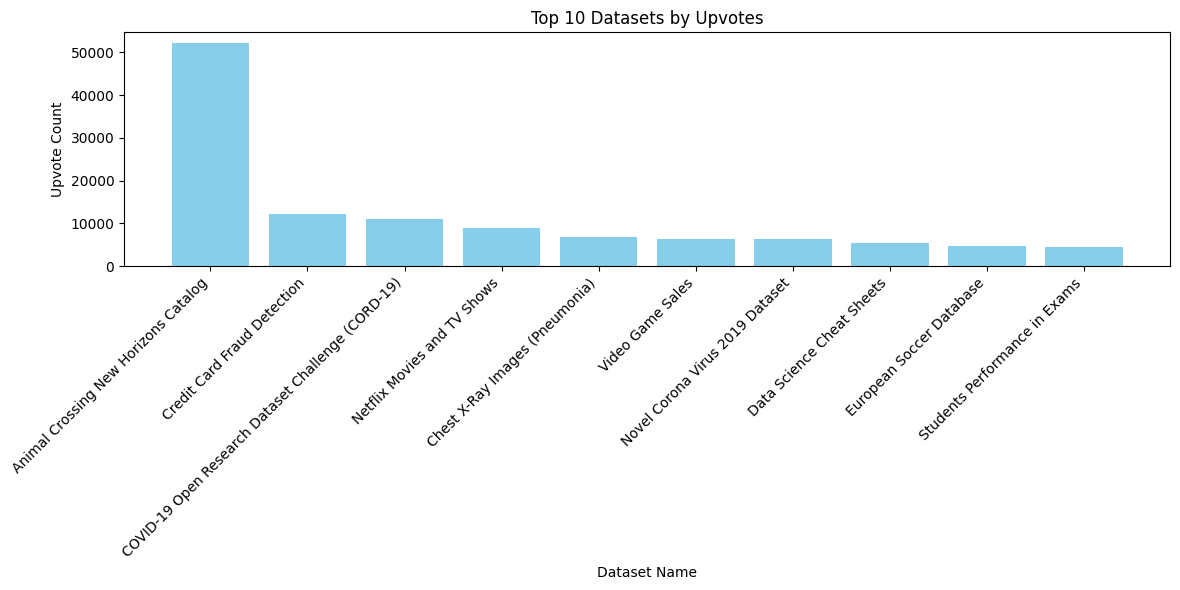

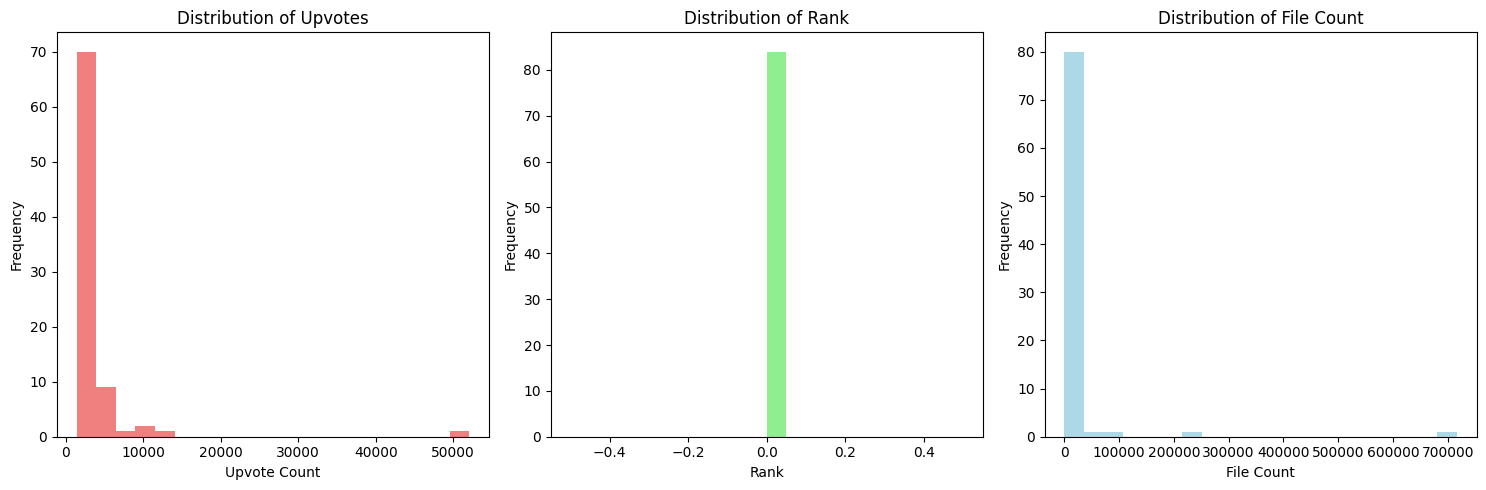

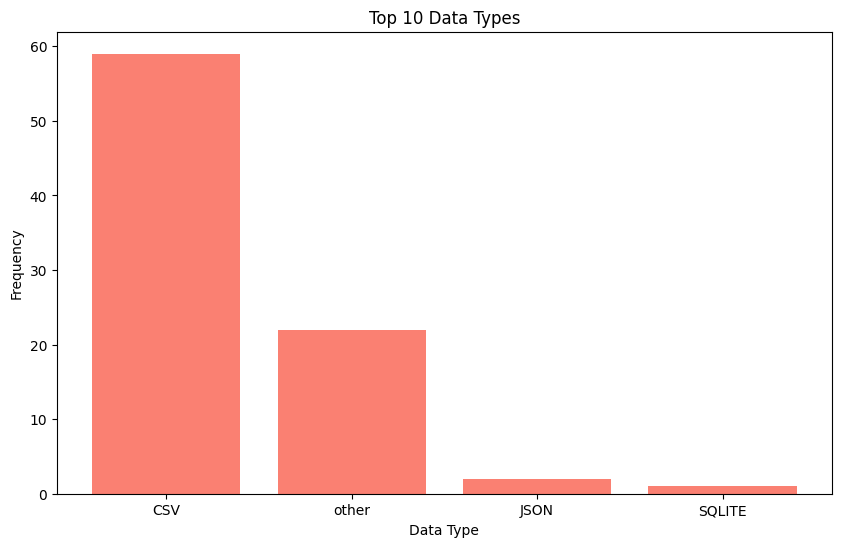

In [9]:
import matplotlib.pyplot as plt

# Bar chart for top 10 datasets based on Upvote count
plt.figure(figsize=(12, 6))
top_10_datasets = df.nlargest(10, 'Upvote')
plt.bar(top_10_datasets['Dataset_Name'], top_10_datasets['Upvote'], color='skyblue')
plt.xlabel("Dataset Name")
plt.ylabel("Upvote Count")
plt.title("Top 10 Datasets by Upvotes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Histograms for 'Upvote', 'Rank', and 'File_Count'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Upvote'], bins=20, color='lightcoral')
plt.xlabel("Upvote Count")
plt.ylabel("Frequency")
plt.title("Distribution of Upvotes")

plt.subplot(1, 3, 2)
plt.hist(df['Rank'], bins=20, color='lightgreen')
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Distribution of Rank")

plt.subplot(1, 3, 3)
plt.hist(df['File_Count'], bins=20, color='lightblue')
plt.xlabel("File Count")
plt.ylabel("Frequency")
plt.title("Distribution of File Count")

plt.tight_layout()
plt.show()


# Bar chart for top 10 most frequent values in 'Data_Type'
plt.figure(figsize=(10, 6))
top_10_data_types = df['Data_Type'].value_counts().nlargest(10)
plt.bar(top_10_data_types.index, top_10_data_types.values, color='salmon')
plt.xlabel("Data Type")
plt.ylabel("Frequency")
plt.title("Top 10 Data Types")
plt.show()